**IMPORTANDO BIBLIOTECAS**

In [1]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.linear_model import LogisticRegression, LinearRegression

#Funções de avaliação dos modelos
from sklearn.metrics import mean_squared_error, classification_report, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carregando o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/JusciAvelino/Monitoria-ModelagemPreditivaDescritiva1//main/Iris.csv')

In [3]:
#Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]
mappingSize = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

**SEPARANDO O CONJUNTO DE DADOS**

In [4]:
#Vamos usar somente duas features SepalWidthCm e PetalLengthCm
X = dataset.iloc[:,[0,1]]
y = dataset.iloc[:,[4]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

**TREINAMENTO DO MODELO - REGRESSÃO LOGÍSTICA**

In [5]:
model = LogisticRegression()
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.62      0.71      0.67        14
           2       0.67      0.62      0.64        13

    accuracy                           0.74        38
   macro avg       0.76      0.75      0.75        38
weighted avg       0.75      0.74      0.74        38



**REGIÃO DE DECISÃO**

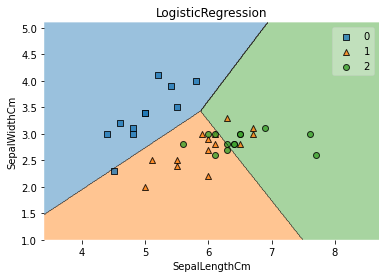

In [6]:
plot_decision_regions(np.array([X_test["SepalLengthCm"].values, X_test["SepalWidthCm"].values]).T, y_test.values.reshape(-1,1).T[0], model)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")

plt.title(model.__class__.__name__)
plt.show()

**REGRESSÃO LINEAR**

In [7]:
dataset_R = pd.read_csv('https://raw.githubusercontent.com/JusciAvelino/Monitoria-ModelagemPreditivaDescritiva1//main/house.csv')

In [8]:
dataset_R

,Price,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4
0,14999,219,0.506849,0.031963,0.146119,0.101852,0.876712,0.000000,0.746988,0.012048,0.060241,0.231482,0.024096,0.987952,0.351852,0.000000,0.800000
1,106200,2273,0.495381,0.018918,0.067312,0.045336,0.794545,0.016718,0.641053,0.002105,0.076842,0.064961,0.017895,0.997895,0.170276,0.054217,0.258064
2,14999,564,0.457447,0.058511,0.299645,0.238562,0.764184,0.010638,0.567273,0.003636,0.014545,0.140625,0.054545,0.996364,0.381250,0.056180,1.000000
3,29900,620,0.495161,0.003226,0.104839,0.086262,0.909677,0.000000,0.792793,0.009009,0.027027,0.051282,0.004504,0.995495,0.183761,0.162791,0.000000
4,85900,3809,0.491730,0.205303,0.107115,0.085744,0.899449,0.000000,0.766566,0.008283,0.039910,0.017024,0.200301,0.985693,0.198372,0.106557,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22779,68300,50618,0.479335,0.021870,0.148801,0.095921,0.884093,0.016615,0.770297,0.004876,0.034184,0.168155,0.018297,0.893886,0.353081,0.136044,0.542948
22780,22700,1090,0.473394,0.020184,0.228440,0.156794,0.794495,0.069725,0.664286,0.000000,0.016667,0.088937,0.009524,0.976190,0.344902,0.097744,0.600000
22781,286100,8272,0.473404,0.009188,0.135880,0.081726,0.774903,0.000000,0.630696,0.002516,0.115180,0.037665,0.008946,0.969248,0.243207,0.042318,0.483871
22782,33800,1438,0.486787,0.006954,0.136300,0.120596,0.849791,0.053547,0.740891,0.002024,0.018219,0.044487,0.002024,0.975708,0.234043,0.090909,0.625000


**SEPARANDO O CONJUNTO DE DADOS**

In [9]:
X = dataset_R.drop([dataset_R.columns[0]], axis = 1)
y = dataset_R[dataset_R.columns[0]]

X_train, X_test, y_train, y_test = train_test_split(X,y)

**TREINAMENTO DO MODELO**

In [10]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

MSE: 2177965249.045985
r2_score: 0.25845974603396105


Text(0.5, 1.0, 'True x Predicted')

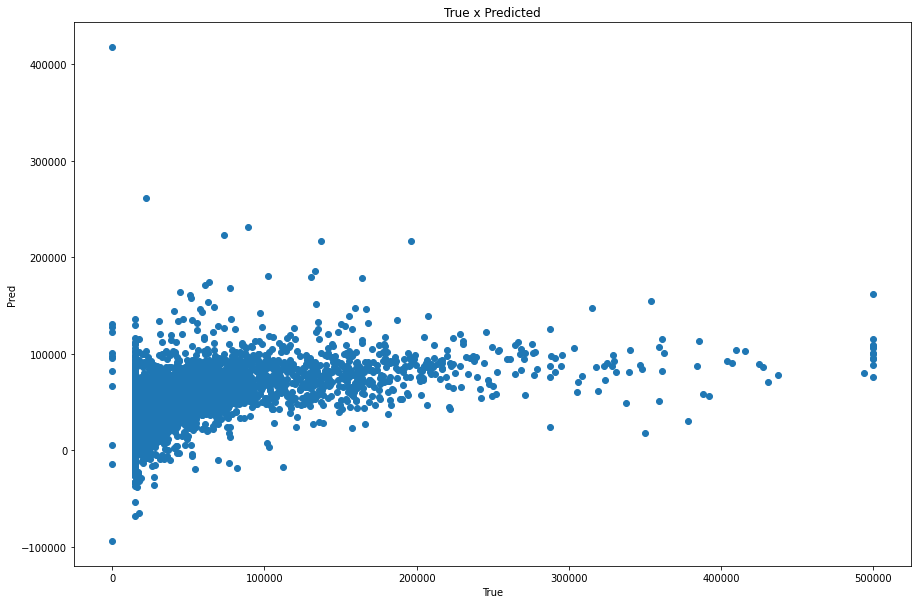

In [11]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("True")
plt.ylabel("Pred")
plt.title("True x Predicted")

In [12]:
pred_y_df = pd.DataFrame({"True Value": y_test, "Predicted value": y_pred, "Difference": y_test-y_pred})
pred_y_df[0:20]

,True Value,Predicted value,Difference
19085,36100,32512.413973,3587.586027
10897,18900,25663.210737,-6763.210737
11703,26300,17317.346508,8982.653492
20793,42200,40954.822968,1245.177032
13965,20900,32361.978494,-11461.978494
1200,14999,5779.316354,9219.683646
4406,168100,132526.208741,35573.791259
2544,31100,39783.481260,-8683.481260
3536,14999,43999.912739,-29000.912739
6932,29000,42402.939026,-13402.939026
